# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')#открыла файл с датами


### Предобработка данных

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.isna().mean()#изучаю насколько загружена таблица, в каких колонках больше всех проусков. в колонка
#ceiling_height,is_apartment ,airports_nearest, cityCenters_nearest, parks_around3000, airports_nearest
#parks_nearest, ponds_around3000, ponds_nearest,  days_exposition  критичное количество пропусков на мой
# взгляд.

     


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [4]:
data.info()#проверяю данные в таблице. некоторые столбцы содержат не числовые значения, хотя площадь и цена 
#должны быть в формате int на мой взгляд

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
print(data.duplicated().sum())

0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

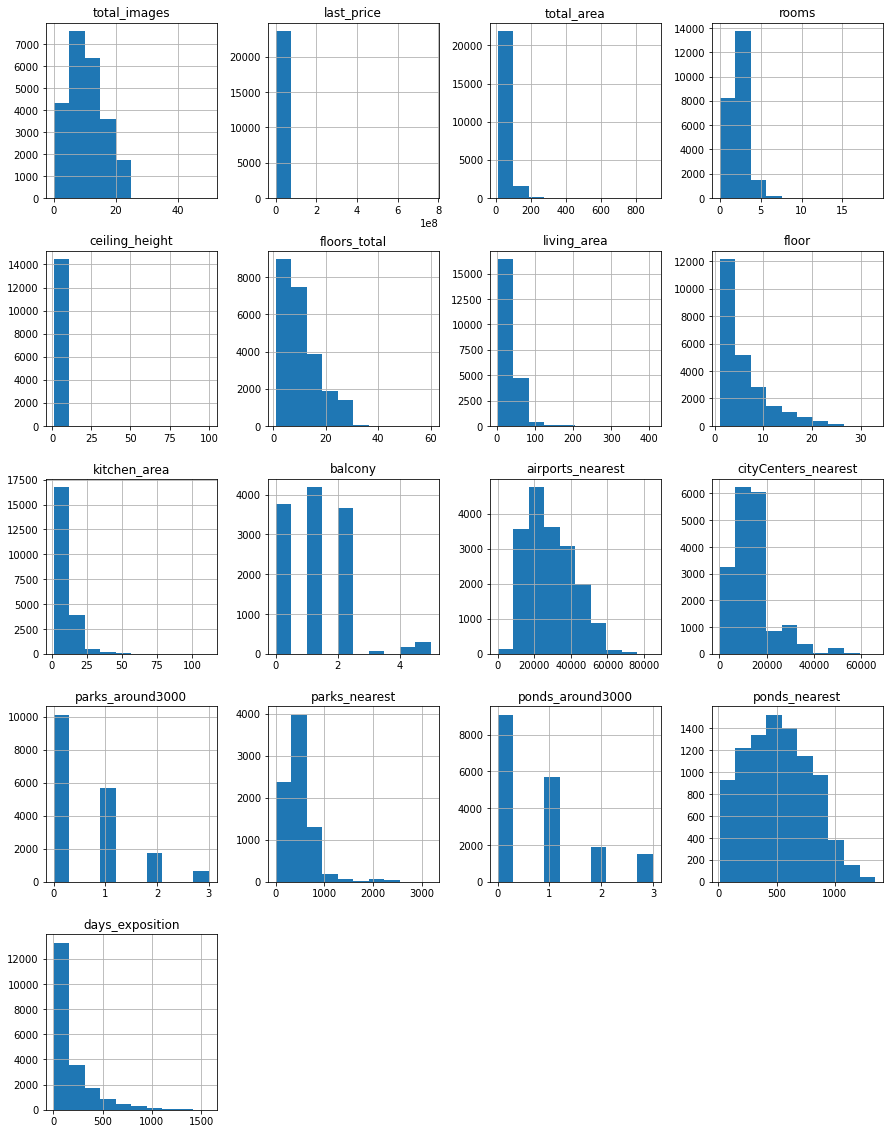

In [6]:
data.hist(figsize=(15, 20))

In [7]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)# расстояние до парка обнулила ячейки где нет значений

построила гистограммы по 17 параметрам. некоторые данные на первый взгляд вообще не понятны, такие как высота потолка (очень высокий потолок). и цена продажи, видимо где то в данных есть ошибки.

In [8]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [9]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)


In [10]:
data['balcony'] = data['balcony'].fillna(0)# данные где нет балкона, обнулим. 

если нет данных балкона скорее всего люди не заполняли, потому что его нет.

In [11]:
data.isna().mean()#незаполненных ячеек стало меньше

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.000000
ponds_around3000        0.000000
ponds_nearest           0.000000
days_exposition         0.134225
dtype: float64

In [12]:
list_to_int = ['rooms',"floor", 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in list_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')
data.head(5)# собрала столбцы и привела их к целым числам

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,0,0,0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0


уникальные значения в столбце с названиями и устраните неявные дубликаты. 
Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» 
и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете 
заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [13]:
data['locality_name'].sort_values().unique()#просматриваем уникальные значения в столбце с названиями и устраняю неявные дубликаты. 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
print(data['locality_name'].duplicated().sum())# сначала посчитаю количество дубликатов

23334


In [15]:
data = data.drop_duplicates()
 # удаление явных дубликатов

In [16]:
print(data['locality_name'].duplicated().sum()) # проверка на отсутствие дубликатов, явных дубликатов не было

23334


In [17]:
data['locality_name'] = data['locality_name'].replace('Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace("поселок Мурино",'посёлок Мурино')
data['locality_name'] = data['locality_name'].replace("поселок Тельмана","посёлок Тельмана")
data['locality_name'] = data['locality_name'].replace("поселок Рябово","посёлок Рябово")# Устранение неявных дубликатов


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что так детально поработала с неявными дубликатами

In [18]:
print(data['locality_name'].duplicated().sum()) 

23337


In [19]:
data['ceiling_height'].sort_values().unique()#перейду к высоте потолков. 

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [20]:
data = data[(data['ceiling_height'] != 1) & (data['ceiling_height'] != 100) & (data['ceiling_height'] != 1.2)]#исключила явно искажающие среднюю данные, аномальные значения

In [21]:
data.loc[(data['ceiling_height']>=20), 'ceiling_height'] / 10    # в некоторых значениях указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Приступаю к их обработке,  аномалии в этом  столбце удалила. 

355      2.50
3148     3.20
4643     2.50
4876     2.70
5076     2.40
5246     2.70
5669     2.60
5807     2.70
6246     2.50
9379     2.50
10773    2.70
11285    2.50
14382    2.50
17496    2.00
17857    2.70
18545    2.50
20478    2.70
20507    2.26
21377    2.75
21824    2.70
22336    3.20
22938    2.70
Name: ceiling_height, dtype: float64

исключаю аномально высокие потолки,и так же увидев что скорее всего точка ошибочно стоит в некоторых данных, разделю на 10. такие данные более похожи на правду.

In [22]:
data['ceiling_height'].sort_values().unique()

array([ 1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,
        2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,

<AxesSubplot:>

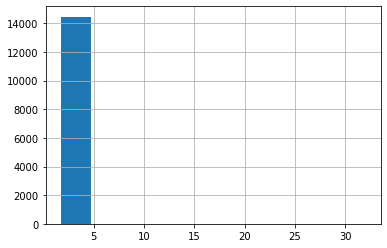

In [23]:
data["ceiling_height"].hist()

In [24]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23696.000000,2.369600e+04,23696.000000,23696.000000,14501.000000,23610.000000,21793.000000,23696.000000,21418.000000,23696.000000,18155.000000,18178.000000,18179.000000,23696.000000,23696.000000,23696.000000,20515.000000
mean,9.858837,6.541427e+06,60.351109,2.070687,2.765024,10.674375,34.459205,5.892556,10.570064,0.590944,28793.097769,14191.601441,0.611310,167.314905,0.590775,199.125886,180.901438
std,5.682300,1.088751e+07,35.655401,1.078450,0.968610,6.597242,22.031471,4.885446,5.905736,0.958916,12631.453807,8608.748237,0.802046,306.726186,0.883860,305.202819,219.737521
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18583.500000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37274.000000,16293.000000,1.000000,301.250000,1.000000,389.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывод:много пропущенных данных по высоте потолка ceiling_height (9195) - 
данная информация достаточно предсказуемая, но она отсуствует. Предполагаю, что некоторые не
считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того,
чтоб узнать высоту своих потолков, иначе бы данные присутствовали. думаю что данные можно 
заполнить константой.
Вполне возможно, заполнять ее по классу квартиры и по удаленности от центра. еще следует избавится от аномальных значений, таких как 1 и 100 к примеру (сделала). теперь мне кажется данные достаточно правдоподобны. еще попробую несколько действий с данными по потолкам:

In [25]:
data['ceiling_height'].unique()#посмотрю уникальные значения

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76, 25.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,
        3.15,  3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,
        5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,
        2.83,  4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,
        3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,
        4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.08,  3.68,
        3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,
        3.14,  4.37,  2.68,  3.22,  3.27, 27.  ,  4.1 ,  2.93,  3.46,
       24.  ,  3.47,

In [26]:
data['ceiling_height'].isnull().sum()

9195

In [27]:
print('Количество NaN по ceiling_height:', data['ceiling_height'].isnull().sum())
#вывожу на экран количество nan

Количество NaN по ceiling_height: 9195


в разделе предобработка данных, мною была рассмотрена предоставленная таблица, я проверила ее на заполненность ее данными. проверила ее на явные и неявные дубликаты, исключила неявные дубликаты.
Изменила тип данных некоторых столбцов. провела корректировку столбца "высота потолков". Исключила невероятно высокие, путем переноса разделительного знака. исключила потолок высотой 1 метр и 100, как аномалии.
заполнила 0 ячейки

# Добавляю в таблицу новые столбцы со следующими параметрами

In [28]:
data["price_area"]=data["last_price"]/data["total_area"]
print(data.head(5))#добавила колонку цены за квадратный метр

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  Санкт-Петербург           18863.0              16028

In [29]:
list_to_float_1 = ["last_price", 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', "price_area"]
for column in list_to_float_1:
   data[column] = data[data[column].notnull()][column].round(2)#округляем до 2 знаков
#Проверяем, что получилось:

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482,2,755,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,0,0,0,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90,2,574,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84,3,234,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112,1,48,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,0,городской посёлок Янино-1,NaN,NaN,NaN,0,0,0,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,1,посёлок Парголово,52996.0,19143.0,0.0,0,0,0,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,0,0,0,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,0,посёлок Мурино,NaN,NaN,NaN,0,0,0,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,0,0,0,289.0,88524.59


In [30]:
#столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
#апартаменты появились относительно недавно
data['is_apartment'] = data['is_apartment'].fillna(False)

In [31]:
data.info()# выгрузим информацию общую по таблице. изучив таблицу, думаю в ней много не заполненных данных,   так как
#в некоторых столбцах не все данные содержаться.  расстояние до аэропорта данных нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23696 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23696 non-null  int64  
 1   last_price            23696 non-null  float64
 2   total_area            23696 non-null  float64
 3   first_day_exposition  23696 non-null  object 
 4   rooms                 23696 non-null  int64  
 5   ceiling_height        14501 non-null  float64
 6   floors_total          23610 non-null  float64
 7   living_area           21793 non-null  float64
 8   floor                 23696 non-null  int64  
 9   is_apartment          23696 non-null  bool   
 10  studio                23696 non-null  bool   
 11  open_plan             23696 non-null  bool   
 12  kitchen_area          21418 non-null  float64
 13  balcony               23696 non-null  int64  
 14  locality_name         23647 non-null  object 
 15  airports_nearest   

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Изменяю формат столбца first_day_exposition на datetime
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  Санкт-Петербург           18863.0             

посмотрим на данные(максимальные и минимальные значения) на их адекватность. колонку цена,пока не трогую, 
дальше переведу ее в млн. общая площадь квартир  представлена от 12 метров кв. до 900 метров. В целом, данные
выглядят нормально. есть32 метровые потолки и 19комнатные квартиры. Будем смотреть. 5 балконов и т.п.

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area
count,23696.000000,2.369600e+04,23696.000000,23696.000000,14501.000000,23610.000000,21793.000000,23696.000000,21418.000000,23696.000000,18155.000000,18178.000000,18179.000000,23696.000000,23696.000000,23696.000000,20515.000000,2.369600e+04
mean,9.858837,6.541427e+06,60.351109,2.070687,2.765024,10.674375,34.459205,5.892556,10.570064,0.590944,28793.097769,14191.601441,0.611310,167.314905,0.590775,199.125886,180.901438,9.940284e+04
std,5.682300,1.088751e+07,35.655401,1.078450,0.968610,6.597242,22.031471,4.885446,5.905736,0.958916,12631.453807,8608.748237,0.802046,306.726186,0.883860,305.202819,219.737521,5.020299e+04
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118300e+02
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18583.500000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000,7.658595e+04
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,0.000000,0.000000,0.000000,95.000000,9.500000e+04
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37274.000000,16293.000000,1.000000,301.250000,1.000000,389.000000,232.000000,1.142549e+05
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06


### Посчитайте и добавьте в таблицу новые столбцы

далее продалжаю добавлять столбцы.
•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
•	месяц публикации объявления;
•	год публикации объявления;
•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);
•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


In [34]:
total_area_new=len(data["total_area"].unique())#Посчитала количество уникальных значений в колонке total_area, сохранила в новую переменную
print(total_area_new)
data['total_area'].unique()


2182


array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [35]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
#•добавляю колонку год публикации объявления;

data['month'] = data['first_day_exposition'].apply(lambda x: x.month)#добавляем •	месяц публикации объявления;
print(data.head(5))
# месяц публикации объявления

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0           

In [36]:
#Добавим день недели публикации объявления:
#Сначала проставим день недели в формате числа (1 - понедельник, 7 - воскресенье):

data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())

dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}
#Меняем значения:

data['day'] = data['day'].map(dict_of_weekdays)

In [37]:
import numpy as np

In [38]:
#Добавяю категорию по этажам (варианты — 'первый', 'последний', 'другой'):
data['level'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['level'] = np.where(data['floor'] == data['floors_total'], 'последний', data['level'])
#Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей:
data['living_area_part'] = data['living_area']/data['total_area']
data['kitchen_area_part'] = data['kitchen_area']/data['total_area']

In [39]:
data['rooms'].unique()#получились ряд квартир с непонятным количеством комнат от 11 до 16??? подумать что с этим делать

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [40]:
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  price_area  year  month  \
0                 2            755              

In [41]:
data['rooms'] = data['rooms'].astype(int)#Замените вещественный   
  #тип данных в столбце total_income на целочисленный с помощью метода astype()
print(data["rooms"].head(5))#вывела проверила

0    3
1    1
2    2
3    3
4    2
Name: rooms, dtype: int64


In [42]:
#расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).

print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())


Количество NaN по cityCenters_nearest: 5518


In [43]:

data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000


In [44]:
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   ponds_nearest  days_exposition  price_area  year month          day  \
0            755              NaN   120370.37  2019   

In [45]:
#Округляем до целого :
list_to_float_2 = ['cityCenters_nearest_km', 'living_area', 'kitchen_area']


for column in list_to_float_2:
    data[column] = data[data[column].notnull()][column].round(0)
#округляем до целого
#Проверяем, что получилось:

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_area,year,month,day,level,living_area_part,kitchen_area_part,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,755,NaN,120370.37,2019,3,4 - четверг,другой,0.472222,0.231481,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,19.0,1,False,...,0,81.0,82920.79,2018,12,2 - вторник,первый,0.460396,0.272277,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.0,4,False,...,574,558.0,92785.71,2015,8,4 - четверг,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,234,424.0,408176.10,2015,7,5 - пятница,другой,NaN,NaN,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,48,121.0,100000.00,2018,6,2 - вторник,другой,0.320000,0.410000,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.0,5,False,...,0,55.0,95065.79,2018,9,1 - понедельник,другой,0.473684,0.299342,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,11.0,6,False,...,0,155.0,99195.71,2017,11,4 - четверг,другой,0.284182,0.386059,19.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0,NaN,110544.69,2019,4,4 - четверг,другой,NaN,0.263966,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.0,26,False,...,0,189.0,87454.76,2018,5,3 - среда,другой,0.465320,0.265682,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,44.0,7,False,...,0,289.0,88524.59,2017,2,7 - воскресенье,другой,0.714754,0.106557,15.0


In [46]:
data.isna().sum()# Выведем количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.
# заметим что только по части колонок значения отсутствуют, посмотрим на них и запомним,   
#чтобы в дальнейшем учесть это при анализе
#В 14 столбцах есть пропущенные значения.  is_apartaments столбец не учитываем, это видимо квартиры - апартаменты
#  ситуация значительно измениоась. предположу что значения в столбце living_area и kitchen_area, отсутствуют
#потому что это данные по студиям
#еще остался показатель days_exposition 1892, возможно его просто не заполняли, поставлю туда среднее количество экспозици
#data['floors_total'] = data['floors_total '].abs()#обработка анамальных значений столбца

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9195
floors_total                86
living_area               1903
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area              2278
balcony                      0
locality_name               49
airports_nearest          5541
cityCenters_nearest       5518
parks_around3000          5517
parks_nearest                0
ponds_around3000             0
ponds_nearest                0
days_exposition           3181
price_area                   0
year                         0
month                        0
day                          0
level                        0
living_area_part          1903
kitchen_area_part         2278
cityCenters_nearest_km    5518
dtype: int64

In [47]:

data['floors_total'].count()#посмотрела анамальные значения в столбу 'floors_total'. их нет
# в представленных данных пугающи много пропусков. начну чистить их постепенно.


23610

In [48]:
data.duplicated().sum()#выводим количество дубликатов. их нет, работаем дальше

0

In [49]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Изменяю формат столбца first_day_exposition на datetime
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         19.0      1         False  ...   
2             NaN           5.0         34.0      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   ponds_nearest  days_exposition  price_area  year month          day  \
0            755              NaN   120370.37  2019   

In [50]:
data["days_exposition"].mean()#проверила среднее количество дней экспозиции квартиры

180.90143797221546

In [51]:
print(data.sort_values(by="days_exposition", ascending=False).head(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
18843            11   3500000.0       48.20           2014-12-15      2   
1109              1  34878556.0       95.80           2014-12-09      2   
9553             11  10600000.0       80.00           2014-12-09      3   
1885              2  13300000.0       79.60           2014-12-09      2   
20969            18  13300000.0      133.00           2015-02-11      4   
6691              3   4400000.0       42.98           2014-12-12      1   
14093             7   9500000.0      100.00           2015-02-19      4   
15313             1   9278000.0      139.80           2014-12-28      4   
19123             9   5990000.0       82.00           2015-02-19      3   
11955             4  11400000.0       76.00           2014-12-09      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
18843            2.50           5.0         27.0      2         False  ...   
1109              

In [52]:
print(data["price_area"].mean())#среднюю цену за квадрат, в принципе все реально

99402.840035027


In [53]:
data["price_area"].describe()

count    2.369600e+04
mean     9.940284e+04
std      5.020299e+04
min      1.118300e+02
25%      7.658595e+04
50%      9.500000e+04
75%      1.142549e+05
max      1.907500e+06
Name: price_area, dtype: float64

In [54]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', data['balcony'].isnull().sum())
print('Количество NaN по airports_nearest:',data['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isnull().sum())
#Изменение типов данных
print(data.sort_values(by="last_price", ascending=False).head(10))

Количество NaN в столбце balcony: 0
Количество NaN по airports_nearest: 5541
Количество NaN по cityCenters_nearest: 5518
       total_images   last_price  total_area first_day_exposition  rooms  \
12971            19  763000000.0       400.0           2017-09-30      7   
19540             8  420000000.0       900.0           2017-12-06     12   
14706            15  401300000.0       401.0           2016-02-20      5   
1436             19  330000000.0       190.0           2018-04-04      3   
15651            20  300000000.0       618.0           2017-12-18      7   
22831            18  289238400.0       187.5           2019-03-19      2   
16461            17  245000000.0       285.7           2017-04-10      6   
13749             7  240000000.0       410.0           2017-04-01      6   
5893              3  230000000.0       500.0           2017-05-31      6   
8900             13  190870000.0       268.0           2016-03-25      3   

       ceiling_height  floors_total  livin

### Проведите исследовательский анализ данных

Изучаю  параметры объектов: 

In [55]:
sample = data.query("month==1")
print(sample['month'].count())#Считаем количество объявлений опубликованных по месецам




1500


In [56]:
sample_2 = data.query("month==2")
print(sample['month'].count())

1500


In [57]:
sample_3 = data.query("month==3")
print(sample['month'].count())

1500


<AxesSubplot:>

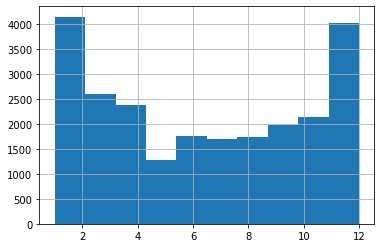

In [58]:
data["month"].hist()# исходя из данных гистограммы, можно сделать выводы, что основные публикации были в 
#декабре, январе.  в период с 4(апрель) по 8(август) месяцы публикаций значительно меньше.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, в период отдыха и отпусков публикаций меньше

Изучаю, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

In [59]:
data["days_exposition"].median()#Посмотрим на данные и гистограмму по времени продажи квартиры:

95.0

In [60]:
data["days_exposition"].mean()

180.90143797221546

In [61]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,20515.000000
mean,180.901438
std,219.737521
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


<AxesSubplot:>

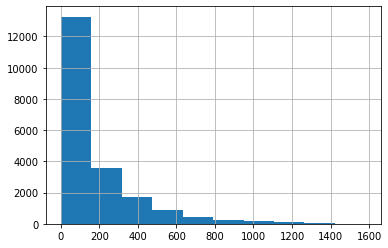

In [62]:
data["days_exposition"].hist()# максимальное время продажт квартиры, составило почти 5 лет, скорее всего 
# это аномальное значение, которое следует исключить, чтобы не портило общую картину времени продаж.


In [63]:
data = data[(data['days_exposition'] != 1553)]#среднее не меняется, можно не исключать такие данные. значит среднее 
#время продажи квартиры 6 месяцев.6 месяцев для продажи квартиры - очень неплохой срок.

In [64]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,20514.000000
mean,180.834552
std,219.533936
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


<AxesSubplot:>

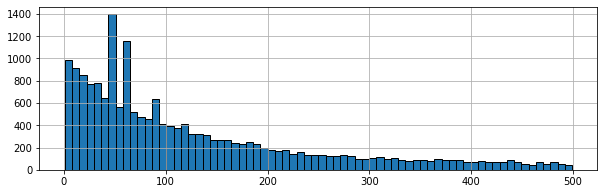

In [65]:
data.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')
#построим гистограмму количество дней продажи квартиры, исользуя условия, количество выставочных дней менее 500

<AxesSubplot:>

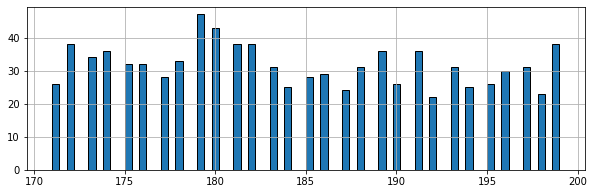

In [66]:
#Посмотрим ближе  пик в 170 и 200 дней.

data.query('170<days_exposition<200')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

комментарий:в строке 65 условие при построение гистограммы было количество выставочных дней менее 500, в гистограмме
представленной ниже взяла размах от 170 до 200, посмотрела что пик у 180 действитель есть, но он не большой
никого интереса для анализа не представил.
необычно быстрая продажа составила 1 день. видимо квартира уже была продана на момент публикации.
объявление выставили и сняли. а необычно долгие продажи 1580 и 1500 дней. 5 лет это что то не реальное. 
причину указать не могу. на диаграмме ниже видно необычные выбросы.

<AxesSubplot:>

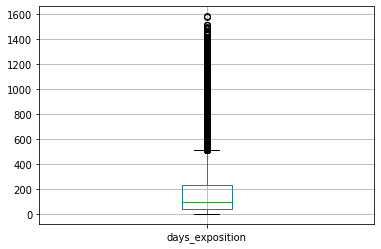

In [67]:
data.boxplot(column='days_exposition')

In [68]:
print(data['last_price'].corr(data['total_area']))#проверила на сколько высока зависимость между ценой и площадью


0.6537235946451704


да зависимость есть

In [69]:
#1.1. Изучаем следующие параметры: площадь, цена, жилая площадь, площадь кухни, число комнат, 
#высота потолков.

data[['total_area', 'last_price', 'rooms', 'ceiling_height',"living_area","kitchen_area"]].describe()


,total_area,last_price,rooms,ceiling_height,living_area,kitchen_area
count,23695.000000,2.369500e+04,23695.000000,14500.000000,21792.000000,21417.000000
mean,60.350280,6.541256e+06,2.070648,2.765019,34.458655,10.554093
std,35.655925,1.088771e+07,1.078456,0.968643,22.034621,5.915005
min,12.000000,1.219000e+04,0.000000,1.750000,2.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000,19.000000,7.000000
50%,52.000000,4.650000e+06,2.000000,2.650000,30.000000,9.000000
75%,69.900000,6.799500e+06,3.000000,2.800000,42.000000,12.000000
max,900.000000,7.630000e+08,19.000000,32.000000,410.000000,112.000000


In [70]:
data["last_price_mln"]=data["last_price"]/1000000#столбец с итоговой ценой переведу в миллионы, чтобы было нагляднее

In [71]:
data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height',"living_area","kitchen_area"]].describe()

,total_area,last_price_mln,rooms,ceiling_height,living_area,kitchen_area
count,23695.000000,23695.000000,23695.000000,14500.000000,21792.000000,21417.000000
mean,60.350280,6.541256,2.070648,2.765019,34.458655,10.554093
std,35.655925,10.887712,1.078456,0.968643,22.034621,5.915005
min,12.000000,0.012190,0.000000,1.750000,2.000000,1.000000
25%,40.000000,3.400000,1.000000,2.520000,19.000000,7.000000
50%,52.000000,4.650000,2.000000,2.650000,30.000000,9.000000
75%,69.900000,6.799500,3.000000,2.800000,42.000000,12.000000
max,900.000000,763.000000,19.000000,32.000000,410.000000,112.000000


count    23695.000000
mean        60.350280
std         35.655925
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

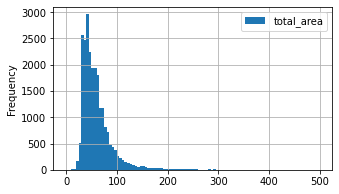

In [73]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()



распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
по гистограмме кроме распределения нечего больше указать, с помошью describe получил общее представление
Изучив общую площадь не вижу ни чего удивительного. Средняя площадь 60 метров (стандартная двушка).

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Хорошо

count    21792.000000
mean        34.458655
std         22.034621
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        410.000000
Name: living_area, dtype: float64

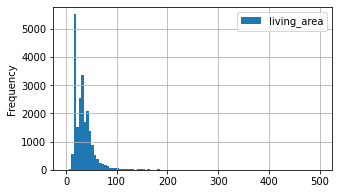

In [74]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['living_area'].describe()
#распределение данных нормальное, есть выбросы аномальные по минимальным значениям, 
#по гистограмме кроме распределения нечего больше указать, с помошью describe получила общее представление
# Изучив жилую площадь не вижу ни чего удивительного. Средняя площадь 34 метров (стандартные жилые комнаты 15-17 метров).
#Интрересно что жилая площадь по объекту в 900 метров сократилась более чем в 2 раза. вероятно дом с бассейном
#и кучей всмогательных, нежилых помещений.

count    21417.000000
mean        10.554093
std          5.915005
min          1.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

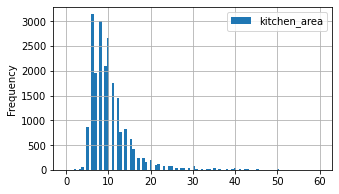

In [75]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,60))
data['kitchen_area'].describe()
#распределение данных нормальное, есть несколько выбросов но они не сильно влияют на данные, 
#по гистограмме кроме распределения нечего больше указать, с помошью describe получила общее представление
# Изучив  площадь  кухни не вижу ни чего удивительного. Средняя площадь 10 метров, минимальная площадьБ
# видимо поставлена номинальна, просто подтвердили наличие кухни.

count    23695.000000
mean         2.070648
std          1.078456
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

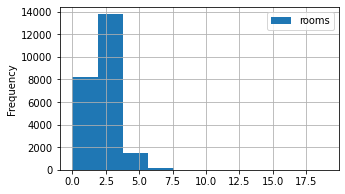

In [76]:
#изучим число комнат
data
data.plot(y = 'rooms', kind = 'hist', grid=True, figsize = (5,3))
data['rooms'].describe()
#с данными все впорядке. максимальное предложение на рынке 1-2-х комнатные квартиры

count    23695.000000
mean         5.892425
std          4.885508
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

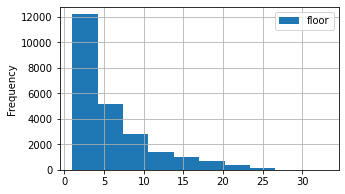

In [77]:
#изучим'этажи'
data
data.plot(y = 'floor', kind = 'hist', grid=True, figsize = (5,3))
data['floor'].describe()
#с данными все впорядке. минимальное значение 1. максимальное 33 этаж.

count    23609.000000
mean        10.674107
std          6.597253
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

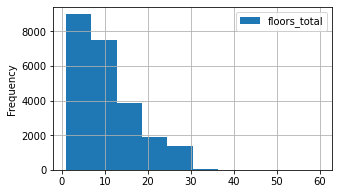

In [78]:
#изучим'этажи'
data
data.plot(y = 'floors_total', kind = 'hist', grid=True, figsize = (5,3))
data['floors_total'].describe()
#с данными все впорядке. минимальное значение 1. максимальное 60 этаж.

count    23695.000000
mean         6.541256
std         10.887712
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799500
max        763.000000
Name: last_price_mln, dtype: float64

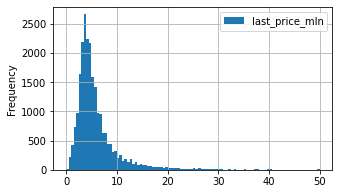

In [79]:
#изучим цену
#data['last_price_mln'] = data['last_price']/1000000
data.plot(y = 'last_price_mln', kind = 'hist', bins = 100, grid=True, range = (0,50), figsize = (5,3))
data['last_price_mln'].describe()


с данными все впорядке . средняя сделка 6,5 миллионов. максимальная 763 млн. на графики сделки оказываю до 50 млн.

In [80]:

data['level'].describe()
#с данными все впорядке. максимальное предложение на рынке 1-2-х комнатные квартиры

count      23695
unique         3
top       другой
freq       17444
Name: level, dtype: object

In [81]:
print(data[data['level'] == 'первый'].count())#посчитаем сделки по этажам


total_images              2891
last_price                2891
total_area                2891
first_day_exposition      2891
rooms                     2891
ceiling_height            1810
floors_total              2888
living_area               2643
floor                     2891
is_apartment              2891
studio                    2891
open_plan                 2891
kitchen_area              2588
balcony                   2891
locality_name             2886
airports_nearest          1991
cityCenters_nearest       1993
parks_around3000          1993
parks_nearest             2891
ponds_around3000          2891
ponds_nearest             2891
days_exposition           2449
price_area                2891
year                      2891
month                     2891
day                       2891
level                     2891
living_area_part          2643
kitchen_area_part         2588
cityCenters_nearest_km    1993
last_price_mln            2891
dtype: int64


In [82]:
print(data[data['level'] == 'последний'].count())

total_images              3360
last_price                3360
total_area                3360
first_day_exposition      3360
rooms                     3360
ceiling_height            2099
floors_total              3360
living_area               3102
floor                     3360
is_apartment              3360
studio                    3360
open_plan                 3360
kitchen_area              3067
balcony                   3360
locality_name             3354
airports_nearest          2332
cityCenters_nearest       2336
parks_around3000          2336
parks_nearest             3360
ponds_around3000          3360
ponds_nearest             3360
days_exposition           2837
price_area                3360
year                      3360
month                     3360
day                       3360
level                     3360
living_area_part          3102
kitchen_area_part         3067
cityCenters_nearest_km    2336
last_price_mln            3360
dtype: int64


In [83]:
print(data[data['level'] == 'другой'].count())
    

total_images              17444
last_price                17444
total_area                17444
first_day_exposition      17444
rooms                     17444
ceiling_height            10591
floors_total              17361
living_area               16047
floor                     17444
is_apartment              17444
studio                    17444
open_plan                 17444
kitchen_area              15762
balcony                   17444
locality_name             17406
airports_nearest          13831
cityCenters_nearest       13848
parks_around3000          13849
parks_nearest             17444
ponds_around3000          17444
ponds_nearest             17444
days_exposition           15228
price_area                17444
year                      17444
month                     17444
day                       17444
level                     17444
living_area_part          16047
kitchen_area_part         15762
cityCenters_nearest_km    13848
last_price_mln            17444
dtype: i

конечно больше всех сделок на прочих этажах, в принципе это и так понятно, позднее поробую создать функцию для анализа. посмотрю что получится на графике

In [84]:
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()

0    14587
1     5717
2     1891
3     1500
Name: ponds_around3000, dtype: int64

count    14500.000000
mean         2.765019
std          0.968643
min          1.750000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

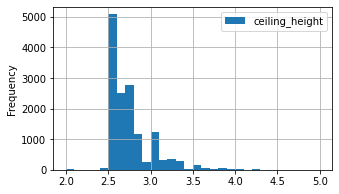

In [85]:
#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
#с данными все впорядке

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
def depend_price(data, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  }
    plt.style.use('seaborn-pastel')
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 15
    data_filtered = data.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = data_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    ax2 = plt.gca()  # удалим xlabel - у нас и так есть многоговорящее название графика
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_kms':
        plt.xticks(rotation=0)
    return plot

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

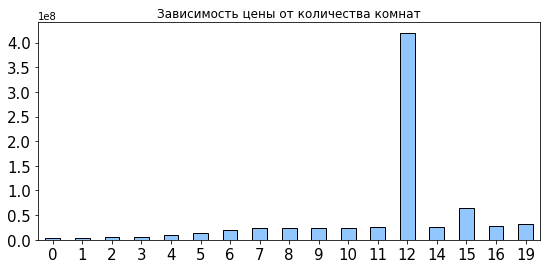

In [88]:
depend_price(data, 'rooms')#изучаю комнаты

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

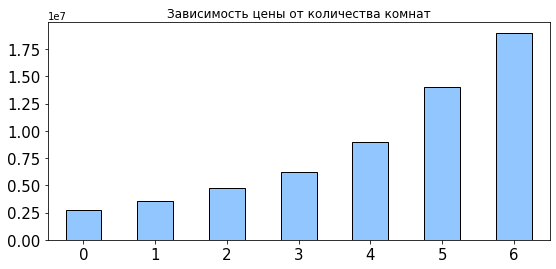

In [89]:
depend_price(data.query('rooms <= 6'), 'rooms')

In [90]:
# создаем отдельную сводную таблицу для создания круговой диаграммы
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='count')

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='level'>

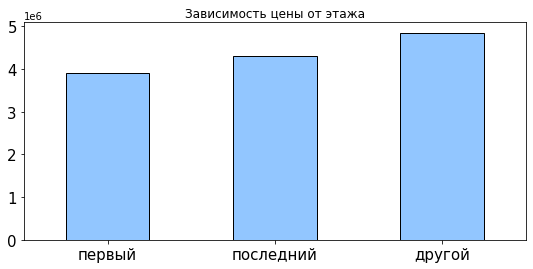

In [91]:
#вернемся к этажам и тоже выведем график
depend_price(data, 'level')

count    18177.000000
mean     14191.440887
std       8608.957833
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

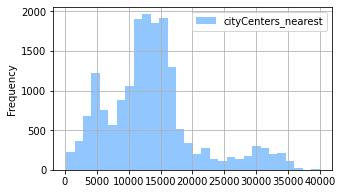

In [92]:
data
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, range = (180,40000), grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()# основные продажи по удаленности от 10 до 17 км от центра

count    18154.000000
mean     28793.741820
std      12631.503613
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37274.500000
max      84869.000000
Name: airports_nearest, dtype: float64

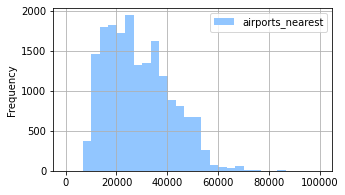

In [93]:
data
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, range = (180,100000), grid=True, figsize = (5,3))
data['airports_nearest'].describe()# основные продажи по удаленности от 15 до 40 км от аэропорта

count    23695.000000
mean       167.321967
std        306.730733
min          0.000000
25%          0.000000
50%          0.000000
75%        301.500000
max       3190.000000
Name: parks_nearest, dtype: float64

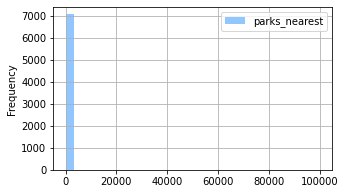

In [94]:
data
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (180,100000), grid=True, figsize = (5,3))
data['parks_nearest'].describe()# основные продажи по удаленности парк рядом

[[<AxesSubplot:title={'center':'days_exposition'}>]]


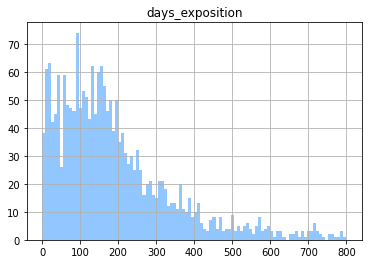

In [95]:
stat = data.pivot_table(index=['total_area'], values='days_exposition')
print(stat.hist(range=(0,800),bins=100))

провела анализ по следующим параметры объектов: 
o	общая площадь;
o	нахожу самую большую площадь и цену
o	o	жилая площадь;
o	площадь кухни;
o	цена объекта;
o	количество комнат;
o	высота потолков;
o	этаж квартиры;
o	тип этажа квартиры («первый», «последний», «другой»);
o	общее количество этажей в доме;
o	расстояние до центра города в метрах;
o	расстояние до ближайшего аэропорта;
o	расстояние до ближайшего парка;
o	день и месяц публикации объявления.
Построила отдельные гистограммы для каждого из этих параметров.
средняя площадь продаваемых квартир 60 м, это двушка не на первои и не напоследнем этаже. средняя цена продажи 6,5 млн. парк чаще всего рядом, удаленность от аэропорта 15-40 км. центр как  правило не далеко. площадь кухни не большая 10 метров. есть и уникадбные сделки по 543 млн. 


In [96]:
#Проведем анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра;

In [97]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_area', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]


,count,mean
locality_name,,
Санкт-Петербург,15718,114817.386202


In [98]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909325


In [99]:
data['total_area'].corr(data['price_area'])

0.30299291535362216

комментарий: по замечаниям добавляю диаграмму. коэффициенты кореляции вывожу для проверки, что зависимость есть. линейная зависимость тоже хорошо. если показатель не 0

0.30299291535362216

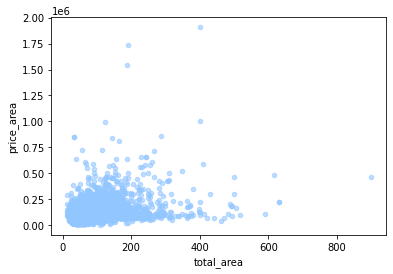

In [100]:
data.plot(kind = 'scatter', y = 'price_area', x = 'total_area', alpha = 0.6)

data['total_area'].corr(data['price_area'])
#Изучим зависимость цены квадратного метра от удалённости от центра.


0.2271602297114343

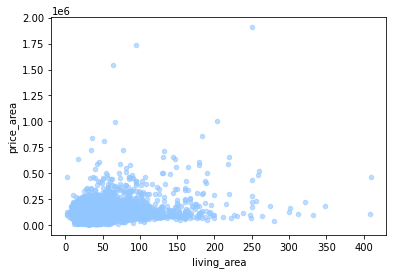

In [101]:
data.plot(kind = 'scatter', y = 'price_area', x = 'living_area', alpha = 0.6)

data['living_area'].corr(data['price_area'])
#Изучим зависимость цены квадратного метра от удалённости от центра.


0.39877373155780166

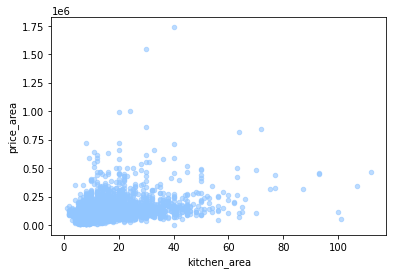

In [102]:
data.plot(kind = 'scatter', y = 'price_area', x = 'kitchen_area', alpha = 0.6)

data['kitchen_area'].corr(data['price_area'])
#Изучим зависимость цены квадратного метра от удалённости от центра.

In [103]:
data['rooms'].corr(data['price_area'])
#чем ближе количество комнат к 3 тем ниже стоимость квадратного метра, коэффициент корреляции, очень низкий



0.05593111321441791

,mean,count,median
level,,,
другой,103484.754202,17444,98288.070
первый,82312.436776,2891,81309.400
последний,92905.919777,3360,87531.675


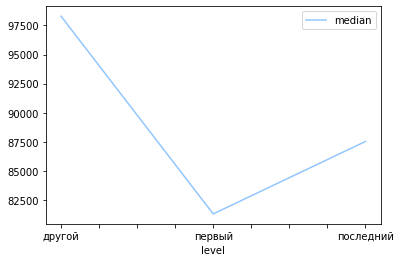

In [104]:
pivot_table_floor_category = data.pivot_table(index = 'level', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category
#Изучим зависимость цены квадратного метра от этажа (первого или последнего). у первого этажа самая низкая цена


0.05593111321441791

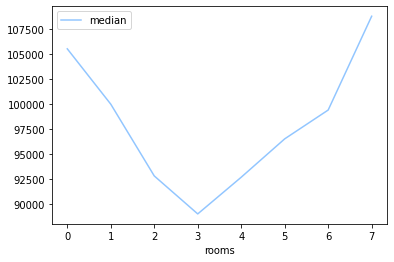

In [105]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_area'])
#чем ближе количество комнат к 3 тем ниже стоимость квадратного метра, коэффициент корреляции, очень низкий


-0.31842968727434784

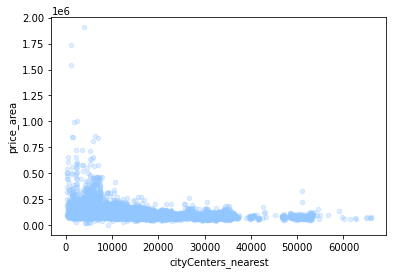

In [106]:
data.plot(kind = 'scatter', y = 'price_area', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['price_area'])
#Изучим зависимость цены квадратного метра от удалённости от центра.


,mean,count,median
year,,,
2014,124774.032647,136,106901.90
2019,107123.780215,2879,103305.79
2018,97713.261692,8517,95687.33
2015,104614.200118,1191,93414.63
2017,97629.517933,8189,92568.45
2016,98322.343252,2783,91743.12


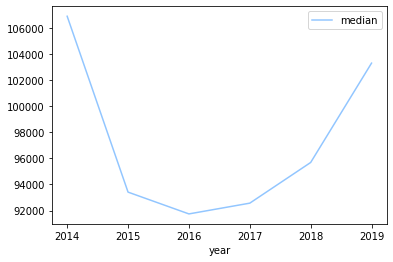

In [107]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)


,mean,count,median
month,,,
4,101949.026200,2379,96451.610
8,100147.857063,1743,96052.630
9,100464.271307,1981,95607.240
11,99230.870881,2371,95588.240
3,98973.215937,2587,95238.100
1,99862.581180,1500,95222.435
2,98768.735538,2640,95000.000
7,99330.261246,1694,95000.000
12,99554.650829,1640,94254.165


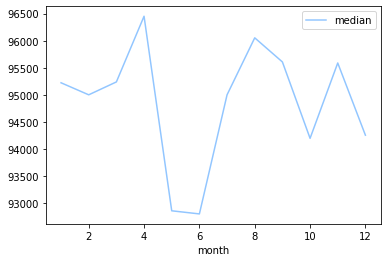

In [108]:
pivot_table_year_exposition = data.pivot_table(index = 'month', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)


,mean,count,median
day,,,
2 - вторник,99726.704316,4182,95613.120
3 - среда,99488.819076,3972,95462.175
4 - четверг,100162.906151,4295,95143.880
1 - понедельник,99456.264132,3611,94696.970
5 - пятница,99012.143458,4000,94616.160
7 - воскресенье,97708.373914,1699,94501.720
6 - суббота,99018.170372,1936,93545.720


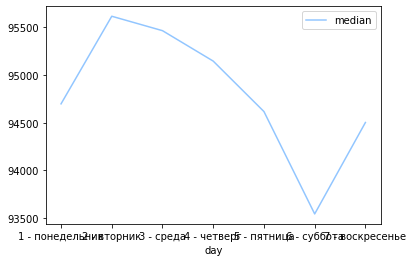

In [109]:
pivot_table_year_exposition = data.pivot_table(index = 'day', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)


,mean,count,median
day,,,
2 - вторник,99726.704316,4182,95613.120
3 - среда,99488.819076,3972,95462.175
4 - четверг,100162.906151,4295,95143.880
1 - понедельник,99456.264132,3611,94696.970
5 - пятница,99012.143458,4000,94616.160
7 - воскресенье,97708.373914,1699,94501.720
6 - суббота,99018.170372,1936,93545.720


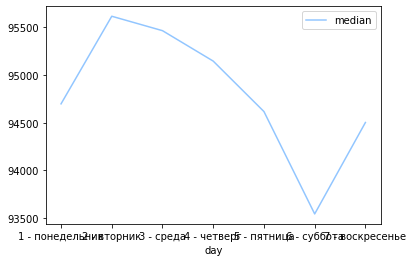

In [110]:
pivot_table_year_exposition = data.pivot_table(index = 'day', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)#стоимость особо не меняется от дня публикации
#  а вот количество публикаций, заметно меняется. самое большое вторник, среда четверг. 


In [111]:
#Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_area', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table


,count,mean
locality_name,,
Санкт-Петербург,15718,114817.386202
посёлок Мурино,590,86087.512017
посёлок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


In [112]:
# самая высокая стоимость за квадратный метр, в городе Санкт Петербург, затем идет Пушкин, поселок 
# Парголово и сестрорецк. Cамая низкая стоимость (ранее описала) в городе Всеволжск.
#выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого
#километра. Опишим, как стоимость объектов зависит от расстояния до центра города.


,price_area
cityCenters_nearest_km,
0,245833.530370
1,177005.407604
2,157849.007290
3,121387.453743
4,133282.874738
5,140509.789022
6,151012.193673
7,156176.879524
8,124875.589581


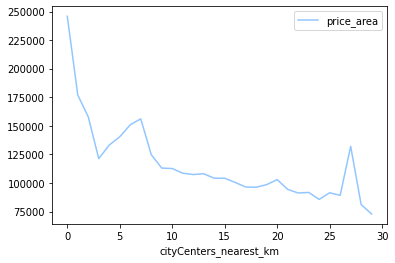

In [113]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_area', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km
#исходя из графика по разбросу цен, до 4 км это центр, далее есть выброс в районе 27 км, наверно это 
#сделка с дорогой недвижимостью закралась.
#Вывод: самая высокая стоимость метра в  январе, апреле и августе! Самая низкая стоимость в июне и 
#ноябре! Значит рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале 
#лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. 
#Наверное, это связано с отпусками.


я  посчитала расстояние до центра в километрах. Теперь выделила квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислила среднюю цену каждого километра. стоимость объектов по мере удаленности от центра стабильно падает, есть правда всплески на 20 и 27 км. видимо это те самые уникальные объекты (может они у финского залива?).

In [114]:
#выделим квартиры в центре, беря за радиус 4 км
center_spb_data = data.query('cityCenters_nearest_km <= 4 and locality_name == "Санкт-Петербург"')

,mean,count,median
year,,,
2019,167233.385333,165,131623.930
2018,138365.498502,474,119204.440
2017,140613.329964,563,117391.300
2015,147279.096364,154,109737.235
2016,131123.250550,200,109652.040


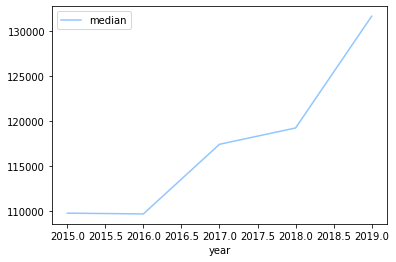

In [115]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year', values = 'price_area', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

проверим динамику изменеий квадратного метра по годам.  Цены стабильно росли.

### Общий вывод

Рассмотрев представленную таблицу по продажам квартир за 2016-2019 по городу и Ленинградской области
можно сделать следующие выводы:
Получив информацию по данным, вначале мное была проведена работа по обработке данных. а именно большое число пропусков или nan в столбцах, были заполнены или нудевыми значениями, либо конкретной величиной.
к примеру is_apartment - я предположила, что "нет данных" там, где ответ - "0",
т.е. это не апартаменты, заполнила столбец false.
Причиной может быть следующее: не многие люди (в том числе и я ранее) особо не знали разницы
между апартаментами и квартирами пропускали эти пункты
parks_nearest (15620), ponds_nearest - вполне возможно,  что данные просто не были выгружены или 
 заполнены по причине их не знания.
balcony (11519) - вполне возможно,  что где балкон отсутствует, там вместо 0 стоит NaN. 
заполнила данный раздел 0.
с данными  ceiling_height (9195) - довольно важная информация, но она отсуствует.  Проанализировав
дразделитель стоял не в нужном месте перенесла. Удалила часть аномальных значений.
заполнила пропущенные значения показателем 2.7 м
days_exposition (3181) - довольно важный параметр. Информация может отсутствовать, например,
что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена,
но не была закрыта на онлайн-ресурсе.
посчитано и добавлено в таблицу: цена одного квадратного метра (price_area)
посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
посчитано и добавлено в таблицу: месяц публикации объявления
посчитано и добавлено в таблицу: год публикации объявления
посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
посчитано и добавлено в таблицу: расстояние в км до центра города
Что было мною изучено:
следующие параметры:
 - общая площадь;
  - жилая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
 В результате проведенного анализа выяснено, что самые дорогие квартиры в центре города 
Санкт-Петербург. Самые дешевые в городе Всеволжск. Средний период продажи квартиры составляет до 
6 месяцев.
 самый большой объем продаж на рынке это 1-2 комнатные квартиры.
 судя по объемам продаж, рынку присуща некая сезоность, самые частные сделки проходили в апреле 
 августе.Вывод: самая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! 
в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. 
Летом все отдыхают.
Зависимость стоимости квадратного метра от года размещения объявления.
Цены на рынке недвижимости стабильно росли, есть над чем задуматься.